# Convolutions and linear regression

There are 2 basic ingredients for neural nets

- convolutions
- multivariate linear regression

We'll start by doing convolutions.

- for the theory in french [read this](https://www.f-legrand.fr/scidoc/docmml/image/filtrage/convolution/convolution.html)
- we'll also be doing some image processing from [this tuto](https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381)



---

The most common use of a convolution is the 
**moving average** = [moyenne mobile](https://fr.wikipedia.org/wiki/Moyenne_mobile)
which is used to smooth noisy data and we'll start with that.

There are 3 sections:

- moving averages and COVID data
- finding borders in image processing 
- the game of life

There are some exercises after each section.

---

Next week we'll do linear regression






In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Smoothing COVID data

So we'll see how a convolution works on real data.
We'll get the latest mortality figures from **GitHub**.

The [source](https://github.com/CSSEGISandData/COVID-19) is maintained by John Hopkins University.


In [374]:
! ../.g


[master 40661cf] web
 1 file changed, 79 insertions(+), 501 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 938 bytes | 85.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   9573a31..40661cf  master -> master


In [3]:
import requests
import pandas as pd

In [4]:
root_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn = 'time_series_covid19_%s_global.csv'

for ss in ['deaths','confirmed']:
    r = requests.get(root_dir + fn%ss, allow_redirects=True)
    open('covid_%s.csv'%ss, 'wb').write(r.content)

## Visualising the data

We'll convert to a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

- If you want to know more [read this in french](http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Data_Manipulation_Pandas.pdf).
- It's basically a table like in Excel
    - columns have names
    - rows are numbered and accessed using ```iloc```.


In [409]:
df = pd.read_csv('covid_deaths.csv')

In [390]:
' '.join(df.columns.tolist()[:20])

'Province/State Country/Region Lat Long 1/22/20 1/23/20 1/24/20 1/25/20 1/26/20 1/27/20 1/28/20 1/29/20 1/30/20 1/31/20 2/1/20 2/2/20 2/3/20 2/4/20 2/5/20 2/6/20'

From the dates we see this is the latest data

In [391]:
' '.join(df.columns.tolist()[-10:])

'11/2/20 11/3/20 11/4/20 11/5/20 11/6/20 11/7/20 11/8/20 11/9/20 11/10/20 11/11/20'

In [392]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41633,41728,41814,41935,41975,42033,42092,42297,42463,42609
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,21523,21904,22300,22721,23210,23705,24206,24731,25294,25801
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,58574,58979,59527,60169,60800,61381,62051,62693,63446,64257
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,4888,4910,5045,5135,5135,5319,5383,5437,5477,5567
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,11228,11577,11813,12102,12223,12335,12433,12680,12816,12953


---

## Looking for France

France is in the rows 116 - 126

''' df.loc[126] ''' is what we want

In [393]:
df.iloc[116:127]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
116,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,10567,10577,10591,10620,10647,10704,10704,10715,10729,10762
117,French Polynesia,France,-17.679700,149.406800,0,0,0,0,0,0,...,8646,8949,9287,9754,9995,9995,9995,10680,10971,11316
118,Guadeloupe,France,16.265000,-61.551000,0,0,0,0,0,0,...,7605,7903,7903,7903,7903,7903,7903,7903,8098,8098
119,Martinique,France,14.641500,-61.024200,0,0,0,0,0,0,...,3552,3552,4215,4215,4215,4215,4215,4215,4732,4732
120,Mayotte,France,-12.827500,45.166244,0,0,0,0,0,0,...,4489,4524,4550,4550,4550,4550,4550,4815,4815,4815
121,New Caledonia,France,-20.904305,165.618042,0,0,0,0,0,0,...,28,28,28,29,29,29,29,29,29,29
122,Reunion,France,-21.115100,55.536400,0,0,0,0,0,0,...,5898,5898,6037,6037,6264,6264,6264,6572,6572,6735
123,Saint Barthelemy,France,17.900000,-62.833300,0,0,0,0,0,0,...,83,83,90,90,90,90,90,90,90,90
124,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,16
125,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,566,566,604,604,604,604,604,604,604,604


In [394]:
#df.iloc[120:150]

It's often easier to work with a numpy array of values

In [410]:
deaths = df.iloc[126][4:].values
deaths[-50:]

array([31252, 31333, 31483, 31483, 31483, 31549, 31711, 31769, 31816,
       31952, 31952, 31952, 32096, 32140, 32219, 32295, 32356, 32356,
       32356, 32456, 32714, 32788, 32876, 33054, 33054, 33054, 33374,
       33636, 33777, 33939, 34236, 34236, 34236, 34746, 35268, 35493,
       35728, 36273, 36494, 36725, 37141, 37564, 38370, 38730, 39557,
       39861, 40131, 40678, 40678, 42215], dtype=object)

# Cumulative deaths

this looks pretty smooth

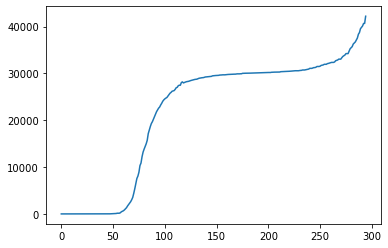

In [411]:
plt.plot(deaths);

But daily figures are noisy

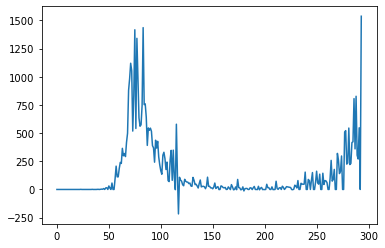

In [412]:
daily = deaths[1:] - deaths[:-1]
plt.plot(daily);

I should use ```np.diff``` to do this.
We get the same graph.

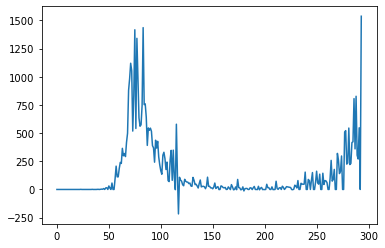

In [413]:
plt.plot(np.diff(deaths,1));

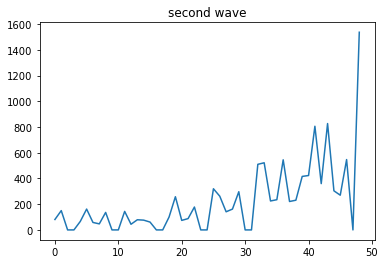

In [414]:
plt.plot(daily[-49:])
plt.title('second wave');

---

## Weekdays

The data is noisy probably because of reporting delays over weekends.


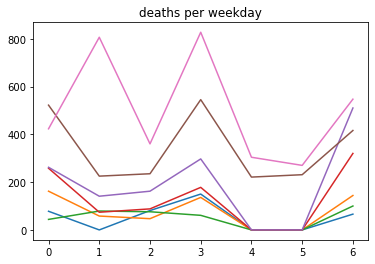

In [415]:
weeks = daily[-51:-2].reshape((-1,7))
for row in weeks:
    plt.plot(row)
    
plt.title('deaths per weekday');

In [51]:
df.columns.tolist()[-9:-2]

['11/3/20', '11/4/20', '11/5/20', '11/6/20', '11/7/20', '11/8/20', '11/9/20']

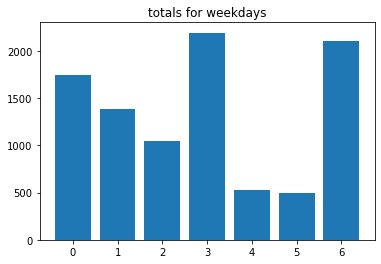

In [416]:
plt.bar(np.arange(7), np.sum(weeks, axis=0))
#plt.plot(np.sum(weeks, axis=0))
plt.title('totals for weekdays');

## Smoothing



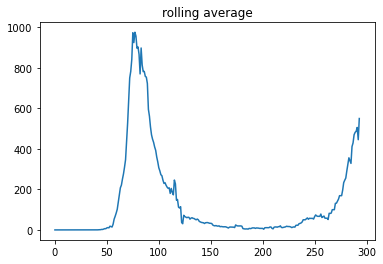

In [417]:
rolling_av = np.convolve(daily, np.ones(7)/7)[:-6]

plt.plot( rolling_av)
plt.title('rolling average');

# looking for the start of the waves

In [419]:
np.where(rolling_av > 100)

(array([ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 270, 271, 272,
        273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
        286, 287, 288, 289, 290, 291, 292, 293]),)

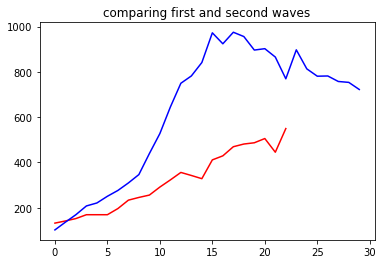

In [439]:
plt.plot(rolling_av[-23:],'r')
plt.plot(rolling_av[60:90],'b');
plt.title('comparing first and second waves');

# Exponential or linear growth in deaths ?

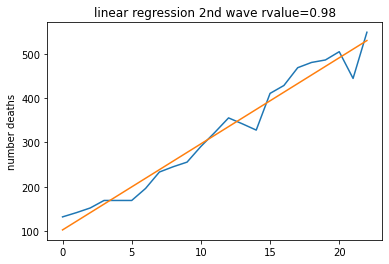

In [440]:
from scipy import stats

X, Y = np.arange(23), rolling_av[-23:].tolist()

plt.plot(X,Y);
coeffs = stats.linregress(X,Y)
a,b = coeffs.slope, coeffs.intercept
plt.plot( X[[0,-1]], a*X[[0,-1]] + b)
plt.title('linear regression 2nd wave rvalue={:.2f}'.format(coeffs.rvalue))
plt.ylabel('number deaths');
    

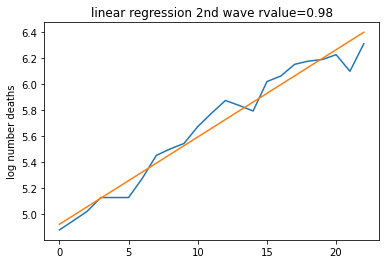

In [441]:
Y = np.log(Y)
plt.plot(X,Y)
coeffs = stats.linregress(X,Y)
a,b = coeffs.slope, coeffs.intercept
plt.plot( X[[0,-1]], a*X[[0,-1]] + b)
plt.title('linear regression 2nd wave rvalue={:.2f}'.format(coeffs.rvalue))
plt.ylabel('log number deaths');

---

## WTF

Both seem equally likely
- linear growth
- exponential growth

The problem is that the exponential factor is tiny
and the [doubling time](https://en.wikipedia.org/wiki/Doubling_time) is large !

In [157]:
np.exp(stats.linregress(X,Y).slope), np.log(2)/ stats.linregress(X,Y).slope

(1.0692519694483285, 10.351767070947615)

--- 

# Exos

I've studied only deaths for the second wave
the file '''covid_confirmed.csv''' 
contains all the stats for the positive cases.

1. Repeat the study above.
Is the growth exponential ?

1. What about the other countries ?

1. What about in the first wave





---

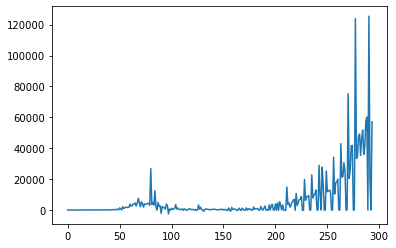

In [427]:
df = pd.read_csv('covid_confirmed.csv')

cases =  df.iloc[126][4:].values
daily = np.diff(cases, 1)
plt.plot(daily);

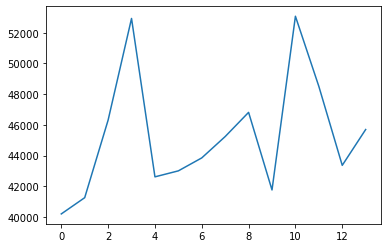

In [437]:

smoothed = np.convolve(daily, np.ones(7)/7)
plt.plot(smoothed[-20:-6]);

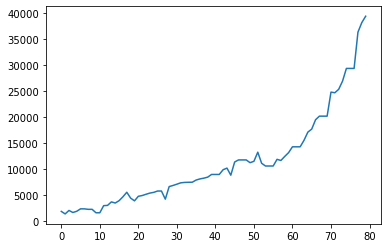

In [451]:
smoothed = np.convolve(daily, np.ones(7)/7)
plt.plot(smoothed[-100:-20]);

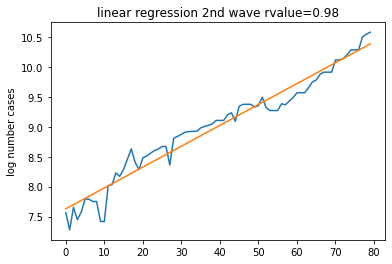

In [447]:
Y = smoothed[-100:-20].tolist()
X = np.arange(len(Y))

Y = np.log(Y)
plt.plot(X,Y)

coeffs = stats.linregress(X,Y)
a,b = coeffs.slope, coeffs.intercept

plt.plot( X[[0,-1]], a*X[[0,-1]] + b)
plt.title('linear regression 2nd wave rvalue={:.2f}'.format(coeffs.rvalue))
plt.ylabel('log number cases');

In [450]:
np.log(2)/a, np.log(2)

(19.873654216253296, 0.6931471805599453)

In [452]:
! ../.g

[master f878b04] web
 1 file changed, 31 insertions(+), 9 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 658 bytes | 658.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   1ef8154..f878b04  master -> master


---

# Following the tuto on convolutions
Read it [here](https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381).
We want to detect the borders between blocks of color in an image.

I'm only doing this to let you see what happend in terms of loops.

There are two loops 
- over x 
- over y

You should only usel loops like this when experimenting as it is **expensive**.

There are better implementations of convolutions  in ```scipy```.


In [4]:
import cv2 
import numpy as np

I got an error because cv2 is not in Anaconda so I installed it.

In Linux you can do it like this:

In [175]:
! pip install opencv-python

     |████████████████████████████████| 49.5 MB 128 kB/s eta 0:00:01


In [5]:
def processImage(image): 
  image = cv2.imread(image) 
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY) 
  return image

In [203]:
def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    # Cross Correlation
    
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape, yKernShape = kernel.shape[0:2]
    xImgShape, yImgShape = image.shape[0:2]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
        
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [242]:
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

image = processImage('./test_image.jpg')

output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output);

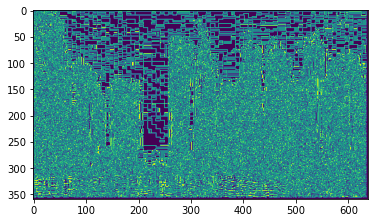

In [13]:
import imageio

im = imageio.imread('./2DConvolved.jpg')
plt.imshow(im);

---

## Let's improve his code 

Change some **dumb** variable names.
- you shouldn't really use [camel case](https://en.wikipedia.org/wiki/Camel_case) 
- use [snake case](https://en.wikipedia.org/wiki/Snake_case) in Python

In [209]:
def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape, yKernShape = kernel.shape
    x_size, y_size = image.shape[0:2]

    # Shape of Output Convolution
    xOutput = int(((x_size - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((y_size - yKernShape + 2 * padding) / strides) + 1)
    
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((x_size + 2 * padding, 
                                y_size + 2 * padding))
        
        border = int(padding)
        # this is a reference to part of part of the bigger array
        imagePadded[ border: -border, border: -border] = image     
        
    else:
        imagePadded = image

    # Iterate through image
    for y in range(y_size):
        # Exit Convolution
        if y > y_size - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(x_size):
                # Go to next row once kernel is out of bounds
                if x > x_size - xKernShape:
                    break
                # this is because there might be an error it is very expensive
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        # this is a dot product
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

## Removing redundant ```if```s

So this guy doesn't know that ```range``` was modified to take into account ```strides```
[OMG](https://docs.python.org/2.3/whatsnew/section-slices.html).

In [214]:

def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape, yKernShape = kernel.shape
    x_size, y_size = image.shape[0:2]

    # Shape of Output Convolution
    xOutput = int(((x_size - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((y_size - yKernShape + 2 * padding) / strides) + 1)
    
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((x_size + 2 * padding, 
                                y_size + 2 * padding))
        
        border = int(padding)
        # this is a reference to part of part of the bigger array
        imagePadded[ border: -border, border: -border] = image     
        
    else:
        imagePadded = image

    # Iterate through image
    for y in range(0,y_size,strides):
        # Exit Convolution
        if y > y_size - yKernShape: break

        for x in range(0,x_size,strides):
            # Go to next row once kernel is out of bounds
            if x > x_size - xKernShape: break
            # this is because there might be an error it is very expensive
            try:
   
                # this is a dot product
                output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
            except:
                 break

    return output

## More redundant ```if```s

I can't believe he is putting this on the web

This is probably the best way to see what is going on


In [26]:
def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape, yKernShape = kernel.shape
    x_size, y_size = image.shape[0:2]

    im_padded = np.pad(image, xKernShape,  
                       mode='constant', 
                       constant_values=(0))
    
    # Initialize Output Convolution
    x_out = int(((x_size - xKernShape + 2 * padding) / strides) + 1)
    y_out = int(((y_size - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((x_out, y_out))

    # Iterate through image
    for y in range(0, y_size - yKernShape, strides):
        for x in range(0, x_size - xKernShape, strides):
            # do the dot product
            output[x, y] = (kernel * im_padded[x: x + xKernShape, y: y + yKernShape]).sum()

    return output

In [16]:
def convolve2D(image, 
               kernel, 
               padding=0,
               strides=1):
    
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape, yKernShape = kernel.shape
    x_size, y_size = image.shape[0:2]

    # Shape of Output Convolution
    xOutput = int(((x_size - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((y_size - yKernShape + 2 * padding) / strides) + 1)
    
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((x_size + 2 * padding, 
                                y_size + 2 * padding))
        border = int(padding)
        imagePadded[ border: -border, border: -border] = image     
        
    else:
        imagePadded = image

    #always alias a lookup before a loop
    kk = kernel.ravel().dot
    # Iterate through image
    for y in range(0, y_size - yKernShape, strides):
        for x in range(0, x_size - xKernShape, strides):
            # do the dot product
            output[x, y] = kk( imagePadded[x: x + xKernShape, y: y + yKernShape].ravel() )
  

    return output



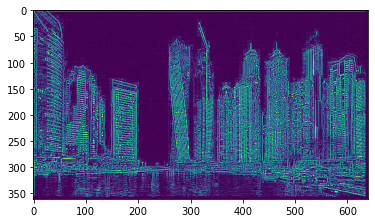

In [27]:
kernel = np.array([[-1, -1, -1], 
                   [-1,  8, -1], 
                   [-1, -1, -1]])

image = processImage('./test_image.jpg')

output = convolve2D(image, kernel, padding=2)
cv2.imwrite('2DConvolved.jpg', output);
im = imageio.imread('./2DConvolved.jpg')
plt.imshow(im);

In [25]:
! ../.g

[master 43775ef] web
 3 files changed, 69 insertions(+), 66 deletions(-)
 rewrite PROG/2DConvolved.jpg (97%)
Counting objects: 6, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 503.05 KiB | 5.59 MiB/s, done.
Total 6 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   0cd8917..43775ef  master -> master


---

## But of course

You would never, ever write a function like this as  ``` cv2```
has functions for
[edge detection](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)

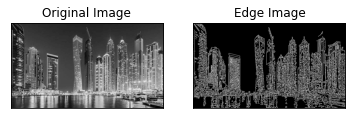

In [250]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./test_image.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

# Exo 

1.Try and compare the difference between the images

- subtract the arrays remember they are vectors
- calculate the $\|.\|_1$ distance
- calculate the $\|.\|_2$ distance
    
2. Change the kernel so that it smooths/blurs the image.

3. Change the value of ```size``` below what happens ?
Fix it so it works.

4. What happens if we smooth a fractal like the Koch curve ?



---


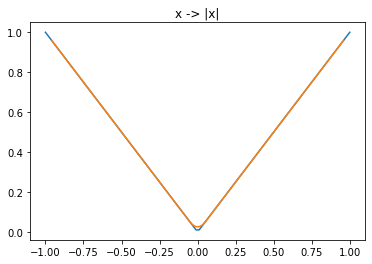

In [336]:
X = np.linspace(-1,1,100)
Y = np.abs(X)

size = 5

plt.plot(X,Y);
plt.plot(X[2:-2], 1/size * np.convolve(Y, np.ones(size))[4:-4])
plt.title('x -> |x|');

# Convolution applied to a curve

There is a problem. Can u see why this doesn't work ?

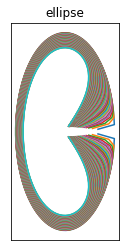

In [361]:
fig, ax = plt.subplots()

#fig.set_size_inches(8,8)
ax.set_aspect('equal')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

K = np.ones(3)/3

T = np.linspace(0, 2*np.pi, 90)
Z = np.exp(1J*T)
X, Y = Z.real, 2*Z.imag
for k in range(100):
    X =  np.convolve(X, K, mode='same')
    Y =  np.convolve(Y, K, mode='same')
    ax.plot(X,Y)
plt.title('ellipse');

# this works

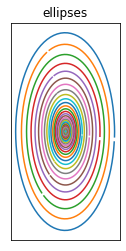

In [371]:
def circular_convolve(X, window=4):
    return sum([np.roll(X,k) for k in range(window)])/window
    

fig, ax = plt.subplots()

#fig.set_size_inches(8,8)
ax.set_aspect('equal')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


T = np.linspace(0, 2*np.pi, 90)
Z = np.exp(1J*T)
X, Y = Z.real, 2*Z.imag
for k in range(2000):
    X = circular_convolve(X)
    Y = circular_convolve(Y)
    if k % 40 == 0:
        ax.plot(X,Y)
plt.title('ellipses');

what is happening ?

In [373]:
(max(Y) - min(Y))/(max(X) - min(X))


1.978965146699576

---

# Game of life

I am going to program this using a convolution and boolean masks.

### References

[a blog](https://nicholasrui.com/2017/12/18/convolutions-and-the-game-of-life/#:~:text=The%20Game%20of%20Life%20is,its%20neighbors%20must%20be%20alive.)

---

The state of the game is represented by a 2D array ```G``` of integers 
$\in \{ 1,0 \}$.
- 0 is dead.
- 1 is alive.

There are four rules in the [game of life](https://fr.wikipedia.org/wiki/Jeu_de_la_vie#R%C3%A8gles).
We apply a convolution to G to obtain H 
which calculates the number of neighbors.


Now we modify the values in H so that they are either 0 or 1 :

- H[H<=2] = 0
- H[(H==4)&(G==0) ] = 0
- H[H>4] = 0
- H[H>0] = 1

---

### Test Code

I have coded a [planeur](https://fr.wikipedia.org/wiki/Planeur_(jeu_de_la_vie))
to test the code.

---

## Animation

I'm going to make an animation. 

- The helper functions  to do this  are in the next cell. 
- You should install [ffmpeg](https://ffmpeg.org/download.html).


In [322]:
import  matplotlib.animation
from matplotlib import animation

from IPython.display import HTML

##Animation code

def plot_images(img_list):
  def init():
    img.set_data(img_list[0])
    return (img,)

  def animate(i):
    img.set_data(img_list[i])
    return (img,)

  fig = plt.figure()
  ax = fig.gca()
  plt.axis('off')
  img = ax.imshow(img_list[0])

  anim = animation.FuncAnimation(fig, animate, 
                                 init_func=init,
                                 frames=len(img_list), 
                                 interval=200, 
                                 blit=True)
  return anim

## Set up 

- random starting configuration G
- the kernel K

In [277]:
G = np.random.randint(0,high=2, size=(10,10))
G

array([[1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 0, 0, 1, 1, 1],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 1, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 0, 0]])

In [320]:
K = np.ones((3,3))
#K[1,1] = 0
K

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

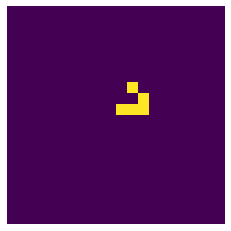

In [321]:
from scipy import signal


G = np.zeros((20,20), dtype=np.int0)
#G[3,4:7] = 1
#G[3:5,3:5] = 1

#G[3,4:7] = 1
#G[4,5:8] = 1

#this is a planeur/glider to test
G[4,5:8] = 1
G[3,7] = 1
G[2,6] = 1

#G = np.random.randint(0, high=2, size=(20,20))

frames = []
for k in range(100):
    H = signal.convolve2d( G, K, boundary='wrap')[1:-1,1:-1]

    H[H<=2] = 0
    H[(H==4)&(G==0) ] = 0
    H[H>4] = 0
    H[H>0] = 1
    G = H
    frames.append(np.copy(G))
    
HTML(plot_images(frames).to_html5_video())

---

# Exo

My code works but my  kernel  K doesn't calculate the number of neighbors

``` 
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])
```

There should be a 0 in the middle like this


``` 
array([[1., 1., 1.],
       [1., 0, 1.],
       [1., 1., 1.]])
```

1. Modify the code to use this kernel
1. According to the wikipedia :

L'état suivant d'une cellule est : (S = 3) OU (E = 1 ET S = 2).

Avec :

S : nombre actuel de cellules vivantes dans son voisinage (entier naturel compris entre 0 et 8 inclus) ;
E : état actuel de la cellule (entier naturel égal à 0 pour une cellule morte et égal à 1 pour une cellule vivante).

Rewrite the code to use this rule and so that there are just 3 lines in th ```for``` loop.


In [325]:
K[1,1] = 0
K

array([[1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.]])

In [335]:
! ../.g

[master 98f81da] web
 1 file changed, 19 insertions(+), 24 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 573 bytes | 573.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   26c02a4..98f81da  master -> master
